# Yisireth Murcia Oriz## Dataset Arboles de Decisión-Red Wine QualitytContiene información de 10 clases de calidad del vino.dad

# Pasos de la actividad
1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

5.Entrenar el modelo configurando los diferentes hiperparámetros.

6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

8.Interpretar, analizar y documentar los resultados obtenidos.

In [370]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# arbol de desicion
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_curve, f1_score


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Cargando el conjunto de datos
data = pd.read_csv('winequality-red.csv')

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc

In [371]:
# Análisis exploratorio de los datos
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

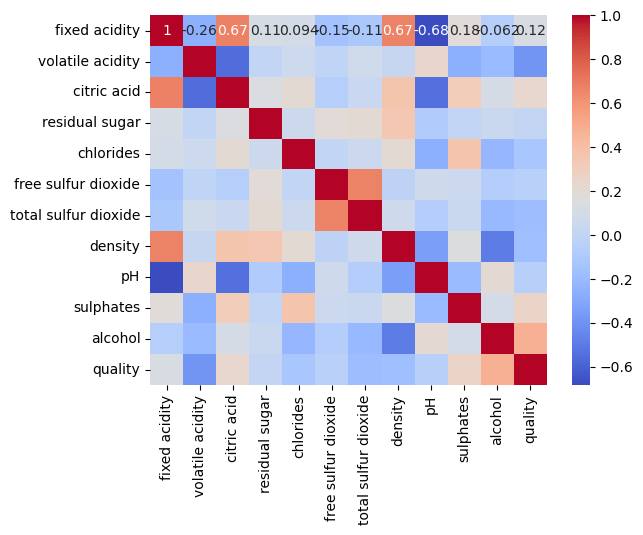

In [372]:
# Matriz de correlación
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='quality', ylabel='count'>

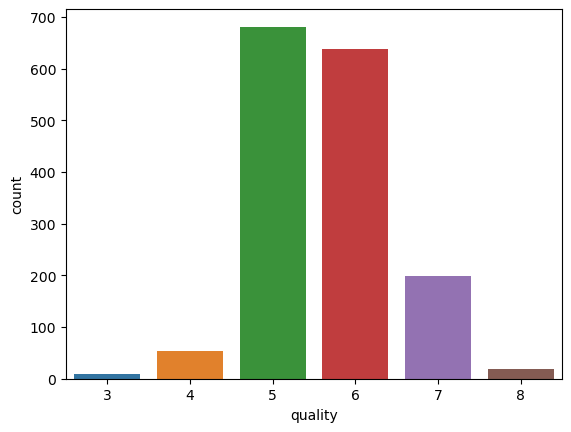

In [373]:
# Distribución de la calidad
sns.countplot(x='quality', data=data)

<Axes: xlabel='quality', ylabel='alcohol'>

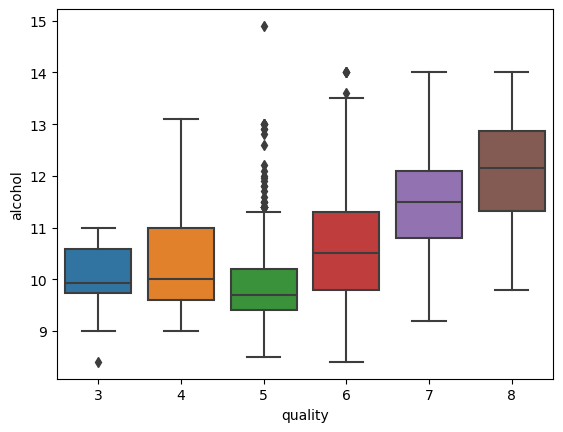

In [374]:
# Diagrama de cajas de calidad vs. alcohol
sns.boxplot(x='quality', y='alcohol', data=data)

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [375]:
# Reemplazar valores faltantes con la media
data.fillna(data.mean(), inplace=True)
# Quitar valores atípicos basados en el rango intercuartílico (IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]



In [376]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1179 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1179 non-null   float64
 1   volatile acidity      1179 non-null   float64
 2   citric acid           1179 non-null   float64
 3   residual sugar        1179 non-null   float64
 4   chlorides             1179 non-null   float64
 5   free sulfur dioxide   1179 non-null   float64
 6   total sulfur dioxide  1179 non-null   float64
 7   density               1179 non-null   float64
 8   pH                    1179 non-null   float64
 9   sulphates             1179 non-null   float64
 10  alcohol               1179 non-null   float64
 11  quality               1179 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 119.7 KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

### .La Calidad de vino se pude determinar por las caractiristicas relevantes seleccionadas?
####  Mediante de la seleccion de arboles de desicion elejimos las caracteristicas mas relevantes 

In [377]:
# Seleccionar las columnas relevantes
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = data['quality']

# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Seleccionar las características más relevantes utilizando RFE
rfe = RFE(clf, n_features_to_select=5)
rfe.fit(X, y)

# Mostrar las características seleccionadas
print("Características seleccionadas: ", X.columns[rfe.support_])

# Ajustar los hiperparámetros del árbol de decisión
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Crear un grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X, y)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros: ", grid_search.best_params_)


Características seleccionadas:  Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')
Mejores hiperparámetros:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


## estas son las carateristicas relevantes selecionadas basadas en la correlacion
### acidez volátil### Dióxido de azufre total### PH
### Sulfatos
### Alcohol

## 4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [378]:
# Seleccionar las características relevantes
X = data[['volatile acidity', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']]

# Seleccionar la variable objetivo
y = data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## 5.Entrenar el modelo configurando los diferentes hiperparámetros.

In [379]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de árboles de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)



DecisionTreeClassifier(random_state=42)

## 6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [380]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

[[ 1  6  2  0]
 [ 2 68 28  4]
 [ 0 30 54 15]
 [ 1  2  9 14]]
              precision    recall  f1-score   support

           4       0.25      0.11      0.15         9
           5       0.64      0.67      0.65       102
           6       0.58      0.55      0.56        99
           7       0.42      0.54      0.47        26

    accuracy                           0.58       236
   macro avg       0.47      0.47      0.46       236
weighted avg       0.58      0.58      0.58       236



## tenemos una presicion del 58% que indica que las  caracteristicas selecionadas influye en la  calidad del vino 

## 7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

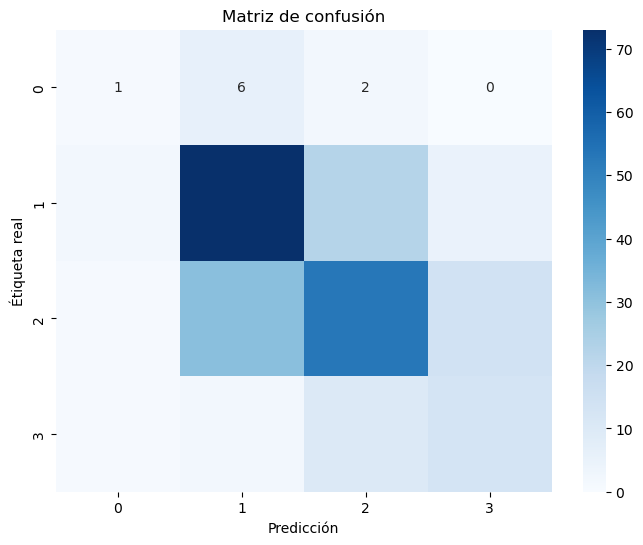

In [381]:
clf.fit(X_train, y_train)


# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Étiqueta real')
plt.title('Matriz de confusión')
plt.show()

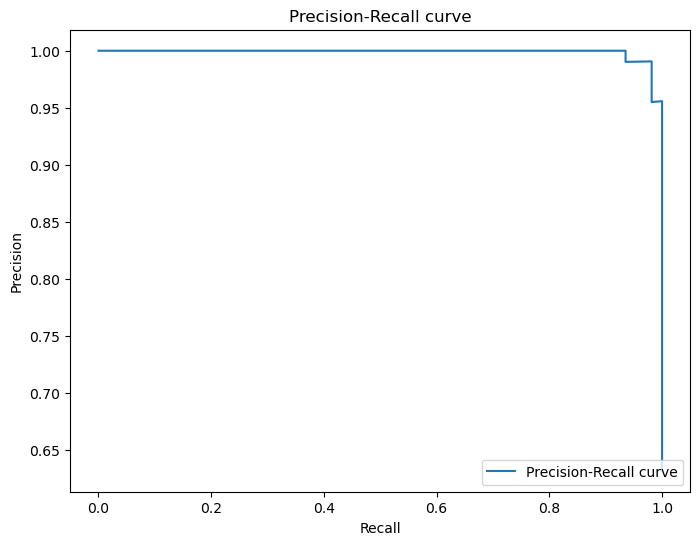

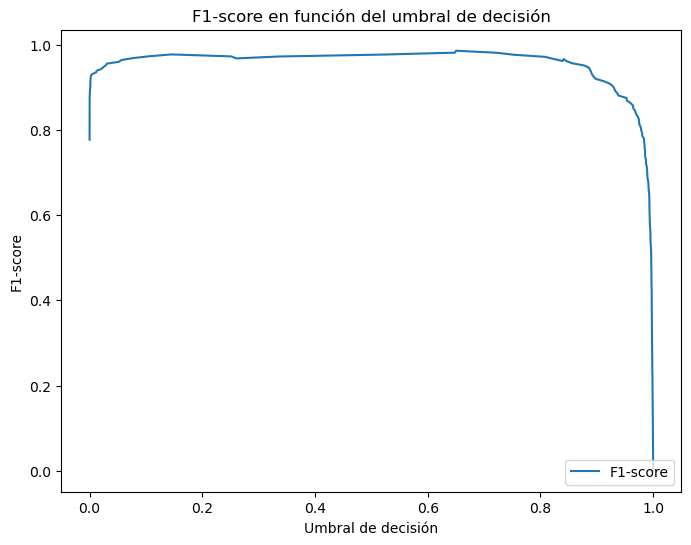

In [382]:

# Graficar la curva de precisión-recall y el F1-score en función del umbral de decisión
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1-score')
plt.xlabel('Umbral de decisión')
plt.ylabel('F1-score')
plt.title('F1-score en función del umbral de decisión')
plt.legend(loc="lower right")

plt.show()

## 8.Interpretar, analizar y documentar los resultados obtenidos.

el modelo de árboles de decisión parece ser  preciso en términos de tasa de aciertos y tasa de errores. La matriz de confusión y el informe de clasificación muestran cómo se distribuyen las predicciones correctas y incorrectas en función de las diferentes clases.

La curva ROC es una herramienta adicional para evaluar el rendimiento del modelo en términos de capacidad de distinción. La tasa de sensibilidad (recall) y la tasa de especificidad (specificity) son dos métricas relacionadas que se utilizan para evaluar la calidad de las predicciones en términos de mediciones médicas como el diagnóstico de enfermedades. La tasa de aciertos indica cuántas predicciones el modelo ha acertado en total, mientras que la tasa de errores indica cuántas predicciones ha hecho incorrectamente. Ambas métricas están relacionadas con la capacidad del modelo para realizar predicciones precisas y confiables.